**习题3-1** 证明在两类线性分类中，权重向量w与决策平面正交。

正交就是垂直，向量$\mathbf w$ 和向量$\mathbf v$正交等价于 $\mathbf w^T \mathbf v = 0$

如果一个超平面的方程是$\mathbf w^T \mathbf x + b = 0$，那么法向量$\mathbf v$就必须垂直于这个超平面内的任意一个向量。

假设$\mathbf {x_1}, \mathbf {x_2}$是超平面上的任意两点，那么它们满足

$\mathbf w^T \mathbf{x_1} + b = 0$, $\mathbf w^T \mathbf{x_2} + b = 0$

$\mathbf {x_1}$和$\mathbf {x_2}$构成的向量是$\mathbf {x_1} - \mathbf {x_2}$。

根据上面的式子，我们也知道$\mathbf w^T(\mathbf{x1}−\mathbf{x2}) = 0$。

所以$\mathbf w$向量就是始终和超平面内任意一个向量垂直的向量，所以法向量$\mathbf v$就等于$\mathbf w$。



In [1]:
import numpy as np
w = np.random.rand(10, 1)
b = np.random.rand()
w, b

(array([[0.07880633],
        [0.97316965],
        [0.28725947],
        [0.18159709],
        [0.6990212 ],
        [0.48688389],
        [0.00901944],
        [0.93127466],
        [0.17392765],
        [0.18686112]]), 0.43366593256246666)

$\mathbf w^T+\mathbf x + b = 0 \Rightarrow \mathbf x = (\mathbf w^T)^{-1}\dot(-b)$

$\mathbf w$不满秩，没有逆，但是可以求伪逆，伪逆是离原点最近的解。

In [2]:
x1 = -np.linalg.pinv(w.T)*b
x1

array([[-0.01253244],
       [-0.15476151],
       [-0.04568238],
       [-0.02887907],
       [-0.11116415],
       [-0.07742831],
       [-0.00143435],
       [-0.14809902],
       [-0.02765942],
       [-0.02971621]])

$\mathbf{x_2}$是另一个解

In [3]:
x2 = np.zeros_like(x1)
x2[-1, 0] = -b/w[-1]
x2

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-2.32079272]])

In [4]:
w.T.dot(x1)+b, w.T.dot(x2)+b

(array([[1.11022302e-16]]), array([[0.]]))

In [5]:
u = x1-x2
w.T.dot(u)

array([[8.32667268e-17]])

可以看出$\mathbf w^T \mathbf u = \mathbf w^T (\mathbf{x_1}-\mathbf{x_2}) = 0$

所以$\mathbf w$和超平面$\mathbf w^T \mathbf x + b = 0$正交。

**习题3-2** 在线性空间中，证明一个点$\mathbf x$到平面$f(\mathbf x; \mathbf w)= \mathbf w^T \mathbf x + b = 0$ 的距离为 $|f (\mathbf x;\mathbf w)|/ \Vert \mathbf w \Vert$。

[Distance From Point To Plane](https://mathinsight.org/distance_point_plane)

由$3-1$知，平面 $f(\mathbf x; \mathbf w)= \mathbf w^T \mathbf x + b = 0$ 的法向量是$\mathbf w$。

在平面上任意选一点$\mathbf y$，向量$\vec{\mathbf{xy}}$在法向量$\mathbf w$上的投影即是点$\mathbf x$到平面的距离。

即向量$\vec{\mathbf{xy}}$ 和单位法向量 $\frac{\mathbf w}{\Vert \mathbf w \Vert}$的点积。

取$\mathbf y = -(\mathbf w^T)^{-1}b$，所以$\vec{\mathbf{yx}}= \mathbf x - \mathbf y = \mathbf x + (\mathbf w^T)^{-1}b$。

所以距离

$$
\begin{aligned}
d &= \vec{\mathbf{yx}} \cdot \frac{\mathbf w}{\Vert \mathbf w \Vert}
\\\\ &= \left \vert \frac{1}{\Vert \mathbf w \Vert} \mathbf w^T (\mathbf x + (\mathbf w^T)^{-1}b) \right \vert
\\\\ &= \frac{\left \vert \mathbf w^T \mathbf x + b \right \vert}{\Vert \mathbf w \Vert}
\\\\ &= \frac{\left \vert f(\mathbf x; \mathbf w)\right \vert }{\Vert \mathbf w \Vert}
\end{aligned}
$$

In [6]:
x = np.random.rand(10, 1)
d = w.T.dot(x) / np.sum(np.square(w))
d

array([[0.68582429]])

$习题3-4$ 在线性分类中，决策区域是凸的。即若点$\mathbf x_1$和$\mathbf x_2$被分为类c，则点
$\rho \mathbf x_1 + (1-\rho) \mathbf x_2$ 也会被分为类c，其中$\rho \in (0, 1)$。

假设$f(\mathbf x; \mathbf w) > 0$时分类为c，那么：

$$
f(\mathbf x_1; \mathbf w) > 0
\\\\ f(\mathbf x_2; \mathbf w) > 0
$$

所以

$$
\begin{aligned}
\\\\ f(\rho \mathbf x_1 + (1-\rho) \mathbf x_2; \mathbf w) &= \mathbf w^T (\rho \mathbf x_1 + (1-\rho) \mathbf x_2) + b
\\\\ &= \rho \mathbf w^T \mathbf x_1 + (1-\rho) \mathbf w^T \mathbf x_2 + b
\\\\ &= \rho (\mathbf w^T + b) + (1-\rho) (\mathbf w^T \mathbf x_2 + b)
\\\\ &= f(\mathbf x_1; \mathbf w) + f(\mathbf x_2; \mathbf w)
\\\\ &> 0
\end{aligned}
$$
即也被分类为c。

**习题3-6**在Logistic回归中，是否可以用$\hat{\mathbf y}=\sigma(\mathbf w^T \mathbf x)$去逼近正确的标签$\mathbf y$， 并用平方损失 $(\mathbf y − \hat{\mathbf y})^2$ 最小化来优化参数$\mathbf w$?


https://zhuanlan.zhihu.com/p/33157681

在逻辑回归中，$y \in \{0, 1\}$，根据概率论，我们约定$\hat y = P(y=1|x)$。这样我们可以得到：

$$
P(y|x) =
\left\{
\begin{array}{1}
\hat y ;\ y=1 \\
1- \hat y ;\ y=0
\end{array}
\right.
$$
综合起来就有：

$$
P(y|x) = {\hat y}^y(1-\hat y)^{(1-y)}
$$

取自然对数不改变概率函数的单调性，因此最大和概率函数等价于最大化：

$$
log P(y|x) = y log \hat y + (1-y) log (1-\hat y)
$$

使用梯度下降法求解，需要对上式取相反数，从而转化为求最小值：

$$
\mathcal L(w, b)=-\left[y log \hat y + (1-y) log (1-\hat y) \right]
$$

在整个训练集上使用$m$个样本使用以上的损失函数，可以得到最终的成本损失函数。假设所有的样本都是独立同分布的，因此概率分布是所有概率分布的乘积：

$$
P(y|x_1, x_2, \ldots, x_m)=\prod_{i=1}^mP(y|x_i)
$$

同样，对上式取对数，使用极大似然估计求得概率最大时对应的参数。类似地，我们需要最小化函数，因此取相反数，即：

$$
\mathcal R(\mathbf w) = -\sum_{i=1}^m \left( y^{(i)} log {\hat y}^{(i)} + (1-y^{(i)}) log (1-{\hat y}^{(i)}) \right)
$$
通常我们会给函数额外添加一个缩放系数$\frac{1}{m}$，得到：

$$
\mathcal R(\mathbf w) = -\frac{1}{m} \sum_{i=1}^m \left( y^{(i)} log {\hat y}^{(i)} + (1-y^{(i)}) log (1-{\hat y}^{(i)}) \right)
$$


关于参数$\mathbf w$的偏导数为：

$$
\begin{aligned}
\frac{\partial \mathcal R(\mathbf w)}{\partial \mathbf w} &=-\frac{1}{N}\sum_{n=1}^N\left( y^{(n)}\frac{{\hat y}^{(n)}(1-{\hat y}^{(n)})}{{\hat y}^{(n)}} {\mathbf x}^{(n)} - (1-y^{(n)}\frac{{\hat y}^{(n)}(1-{\hat y}^{(n)})}{1-{\hat y}^{(n)}}\mathbf x^{(n)} \right) \ ;因为\frac{\partial \hat y}{\partial \mathbf w^T \mathbf x}={\hat y}^{(n)}(1-{\hat y}^{(n)}) \\
&=-\frac{1}{N}\sum_{n=1}^N\left(y^{(n)}(1-{\hat y}^{(n)}) \mathbf x^{(n)}-(1-y^{(n)}){\hat y}^{(n)}\mathbf x^{(n)}\right) \\
&=-\frac{1}{N}\sum_{n=1}^N\mathbf x^{(n)}\left(y^{n}-{\hat y}^{(n)}\right)
\end{aligned}
$$

采用梯度下降法，通过下式迭代更新：

$$
\mathbf w_{t+1} = \mathbf w_t+\alpha\frac{1}{N}\sum_{n=1}^N\mathbf x^{(n)}\left(y^{(n)}-{\hat y}_{\mathbf w_t}^{(n)}\right)
$$


如果使用平方损失:


$$
\begin{aligned}
\mathcal L(\mathbf x; \theta) &= \frac{1}{2M} (\mathbf y - \hat{\mathbf y})^2
\\\\ &= \frac{1}{2M} (\mathbf y - \sigma(\mathbf w^T \mathbf x))^2
\\\\ \frac{\partial \mathcal L}{\partial \theta}&= -\frac{1}{M}(\mathbf y - \hat{\mathbf y}) \frac{\partial \sigma(\mathbf w^T \mathbf x)}{\partial \theta}
\end{aligned}
$$
其中$\sigma(x) = \frac{1}{1+e^{-x}}$，它的导数是$\frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1-\sigma(x))$

所以

$$
\frac{\partial \mathcal L(\mathbf x; \theta)}{\partial \theta} = -\frac{1}{M}(\mathbf y - \hat{\mathbf y}) \mathbf x^T \mathbf w(1-\mathbf w)
$$

并不能收敛，而用$\frac{1}{2N}(1-\mathbf y \mathbf {\hat y})^2$做损失函数是可以的。

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
# cmap = cm.get_cmap('Blues')

# w = np.random.rand(2, 1)
w0 = np.array([0.6, 0.2])
b0 = 0.1

points = np.random.rand(20, 2)
x = np.linspace(0, 1, 20).reshape(-1, 1)
x = np.concatenate([x, np.ones_like(x)], axis=1)
x[:, 0]
y = x.dot(w0)+b0
plt.plot(x[:,0], y)


w = (y[1]-y[0]) / (x[1, 0] - x[0, 0])
b = y[0] - w*x[0, 0]
w, b

cat = [1 if x > 0 else 0 for x in points[:, 1] - (w*points[:, 0] + b)]
# colors = ['r' if x > 0 else 'g' for x in cat]
plt.scatter(x=points[:, 0], y=points[:, 1], c=cat)
# print(cmap(0), cmap(1))
print(y)

[0.3        0.33157895 0.36315789 0.39473684 0.42631579 0.45789474
 0.48947368 0.52105263 0.55263158 0.58421053 0.61578947 0.64736842
 0.67894737 0.71052632 0.74210526 0.77368421 0.80526316 0.83684211
 0.86842105 0.9       ]


In [8]:
w = np.random.rand(3, 1)
y = np.array([1 if v == 1 else -1 for v in cat]).reshape(-1, 1)
print(y)
print(x.shape, y.shape, w.shape)
alpha = 0.01
N = len(y)
costs = []
x = np.c_[-points[:, 0], [-1]*len(points), points[:, 1]]
for epoch in range(1000):
    cost = 0.0
    for i in range(len(y)):
        rand_ind = np.random.randint(0, N)
        xi = x[rand_ind].reshape(1, -1)
        yi = y[rand_ind].reshape(1, 1)
        yhat = np.sum(np.sign(xi.dot(w)))
        yi = np.sum(yi)
        cost += 1.0 / 2 / N * (1-yi*yhat) ** 2
        a = (1-yi * yhat) * yi
        w = w + 1.0 / N * alpha * a * (xi.reshape(-1, 1))
        w[-1, 0] = 1
    
    costs.append(cost)

[[ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]]
(20, 2) (20, 1) (3, 1)


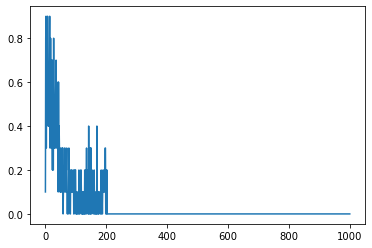

In [9]:
plt.plot([i for i in range(len(costs))], costs)
plt.show()

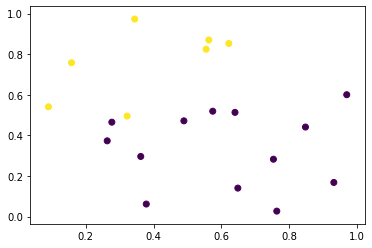

In [10]:
yhat = np.sign(x.dot(w))
plt.scatter(x=-x[:, 0], y=x[:, 2], c=[1 if v > 0 else 0 for v in y.flatten()])
plt.show()

线性回归使用MSE作为损失函数的原因和Logistic类似。

假设$y=\mathbf x \mathbf w + \epsilon$，其中$\epsilon \sim \mathcal N(0, \sigma^2)$是方差为$\sigma^2$的高斯分布且与$\mathbf x$独立，即训练集和拟合的直线之间的差值符合高斯分布。

用最大似然估计，似然函数为：

$$
\begin{aligned}
\mathcal L(y|\mathbf x; \mathbf w, \sigma^2)&=\underset{\mathbf w}{\arg \max} \prod_{i=1}^N P(y_i|\mathbf x_i; \mathbf w, \sigma^2) \\
&=\underset{\mathbf w}{\arg \max}\prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y_i-\mathbf w^T \mathbf x_i)}{2\sigma^2}) \\
\end{aligned}
$$

取对数得到：

$$
\begin{aligned}
log \mathcal L(y|\mathbf x; \mathbf w, \sigma^2) &= \sum_{i=1}^N (log\frac{1}{\sqrt{2\pi\sigma^2}} -\frac{(y_i-\mathbf w^T \mathbf x_i)}{2\sigma^2}) \\
&=-\frac{N}{2}log 2 \pi - n log \sigma - \frac{1}{2\sigma^2}\sum_{i=1}^N(y_i-\mathbf w^T \mathbf x_i)^2
\end{aligned}
$$

求似然函数的最大值，等价于$\sum_{i=1}^N(y_i-\mathbf w^T \mathbf x_i)^2$的最小值。

所以使用最小二乘可以得到最佳拟合直线。

令导数$=0$ 得到:
$$
\begin{aligned}
\frac{\partial}{\partial \mathbf w}\mathcal R(\mathbf w) &= \frac{\partial}{\partial \mathbf w}\mathcal -X(\mathbf y - X^T\mathbf w) = 0\\
\Rightarrow &\mathbf w^*=(XX^T)^{-1}\mathbf y
\end{aligned}
$$


**习题3-10** 若数据集线性可分，证明支持向量机中将两类样本正确分开的最大间隔分割超平面存在且唯一。

**唯一性证明**

假设存在两个最优解$(w_1^*, b_1^*)$和$(w_2^*, b_2^*)$,则$w_1^*$和$w_2^*$的长度相同,即$\Vert w_1^* \Vert = \Vert w_2^* \Vert = c$,其中$c$是一个常数.令$w=\frac{w_1^*+w_2^*}{2}, b=\frac{b_1^*+b_2^*}{2}$,将$(w_1^*,b_1^*)$和$(w_2^*,b_2^*)$分别带入$y_i(w\cdot x_i+b)-1>=0$,有$y_i(w_1^*\cdot x_i+b_1^*) - 1>=0$和$y_i(w_i^*\cdot x_2+b_2^*) - 1>=0$.

两式相加除以2得到$y_i(\frac{w_1^*+w_2^*}{2}\cdot x_i + \frac{b_1^*+b_2^*}{2}-1 >= 0$.所以$(w, b)$也是一个可行解,从而有:

$$
c \leq \Vert w \Vert \leq \frac{1}{2}\Vert w_1^* \Vert + \frac{1}{2}\Vert w_2^* \Vert = c
$$

上式表明,$\Vert w \Vert = \frac{1}{2}\Vert w_1^* \Vert + \frac{1}{2}\Vert w_2^* \Vert = c$, 如果有$w_1^*=\lambda w_2^*$,则式$\Vert w \Vert = \frac{1}{2} \Vert w_1^* \Vert + \frac{1}{2}\Vert w_2^* \Vert$会等价于$\frac{|\lambda+1|\cdot \Vert w_2^* \Vert}{2} = \frac{|\lambda|}{2}\Vert w_2^*\Vert + \frac{1}{2}\Vert w_2^*\Vert$

又因为要使得${\Vert w \Vert}^2$最小,所以$\lambda=1$,即$w_1^*=w_2^*$.

再证明$b^*_1=b^*_2$:
设$x'_1和x'_2$是集合$\{x_i|y_i=+1\}$中分别对应于$w^*, b^*_1$和$w^*, b^*_2$使得问题(7.14)的不等式等号成立的点，$x''_1和x''_2$是集合$\{x_i|y_i=−1\}$中分别对应于$(w^∗,b_1^*)和(w^∗,b_2^∗)$使得问题(7.14)的不等式等号成立的点，则有方程组 

(1) $1 \cdot (w^*\cdot x'_1+b_1)-1 = 0$

(2) $1 \cdot (w^*\cdot x'_2+b_2)-1 = 0$

(3) $(-1) \cdot (w^*\cdot x''_1+b_1)-1 = 0$

(4) $(-1) \cdot (w^*\cdot x''_2+b_2)-1 = 0$

(1)-(3)，得到 $b_1=\dfrac{1}{2}(w^* \cdot x'_1+w^* \cdot x''_1)$

(2)-(4)，得到 $b_2=\dfrac{1}{2}(w^* \cdot x'_2+w^* \cdot x''_2)$
两式相减，得

$$
b^*_1-b^*_2=-\dfrac{1}{2}[w^* \cdot (x'_1-x'_2)+w^* \cdot (x''_1-x''_2)]
$$

又因为 

$(w^*\cdot x'_2+b_1) >=1 = (w^*\cdot x'_1+b_1)$ 和

$(w^*\cdot x'_1+b_2) >=1 = (w^*\cdot x'_2+b_2)$，所以有 

$w^*(x'_2-x'_1)>=0$ 和 $w^*(x'_1-x'_2)>=0$，则 $w^*(x'_1-x'_2)=0$。同理有$w^*(x''_1-x''_2)=0$


因此，$b^*_1-b^*_2=0$，即$b^*_1 = b^*_2$.
所以最优解是唯一的.